# Extracted Features on cleaned data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
import spacy
nlp = spacy.load('en_core_web_md')

from functools import reduce
from collections import namedtuple
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_colwidth", 500)

In [4]:
# read the train data labels
train_labels = pd.read_csv("../cleaned_data/train_labels.csv", encoding="utf-8")

In [5]:

# remove unwanted column header writes
train_post_clean = pd.read_csv("../cleaned_data/train_post_clean_features.csv", encoding="utf-8", header=0)
train_post_clean = train_post_clean.drop(index=train_post_clean[train_post_clean.adjective == 'adjective'].index)

# change to float
train_post_clean = train_post_clean.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# taking list() is needed because index different for both the df
train_post_clean['label'] = list(train_labels.label)

# <center>Analysis</center>

In [7]:
df = train_post_clean.sample(100000, random_state=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1811462 to 1031489
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   adjective     100000 non-null  int64 
 1   adposition    100000 non-null  int64 
 2   adverb        100000 non-null  int64 
 3   verb          100000 non-null  int64 
 4   interjection  100000 non-null  int64 
 5   conjunction   100000 non-null  int64 
 6   noun          100000 non-null  int64 
 7   pronoun       100000 non-null  int64 
 8   other         100000 non-null  int64 
 9   label         100000 non-null  object
dtypes: int64(9), object(1)
memory usage: 8.4+ MB


In [12]:
df.describe()

,adjective,adposition,adverb,verb,interjection,conjunction,noun,pronoun,other
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.441120,0.075990,1.028960,4.388800,0.317040,0.146730,14.361630,0.024590,1.331190
std,6.719418,0.304231,1.551672,5.188752,4.561372,0.421405,17.934198,0.170134,1.996678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,9.000000,0.000000,1.000000
75%,5.000000,0.000000,1.000000,6.000000,0.000000,0.000000,19.000000,0.000000,2.000000
max,1391.000000,14.000000,35.000000,344.000000,1103.000000,7.000000,1819.000000,7.000000,197.000000


In [99]:
import plotly.graph_objects as go

In [11]:
theta_list = list(df.columns)
theta_list.remove('label')

In [12]:
# Strandard scale the varibales
for col in theta_list:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1,1))

In [163]:
def distribution_plots(df, var_list, target_col_name, n_rows, n_cols, suptitle=None, caption=None):
    
    color_dict = {'abuse': 'red', 'no_abuse': 'blue'}
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    
    cat_list = df[target_col_name].unique()
    
    row = 0
    col = 0
    for var in var_list:
        plt.subplot(ax[row][col])
        for category in cat_list:
            sns.distplot(df[var][df['label']==category], hist=False, label=category, color=color_dict[category])
        plt.legend()
        ax[row][col].margins(0.05)
        plt.xlabel('')
        plt.title(var)
        
        col+=1
        if col == n_cols: # increment row (next row) and 
            row += 1
            col = 0
    
    if suptitle:
        plt.suptitle(suptitle)
    if caption:
        plt.figtext(0.5, 0.0, caption, wrap=True, horizontalalignment='center', fontsize=10)
        
    fig.tight_layout()
    plt.show()

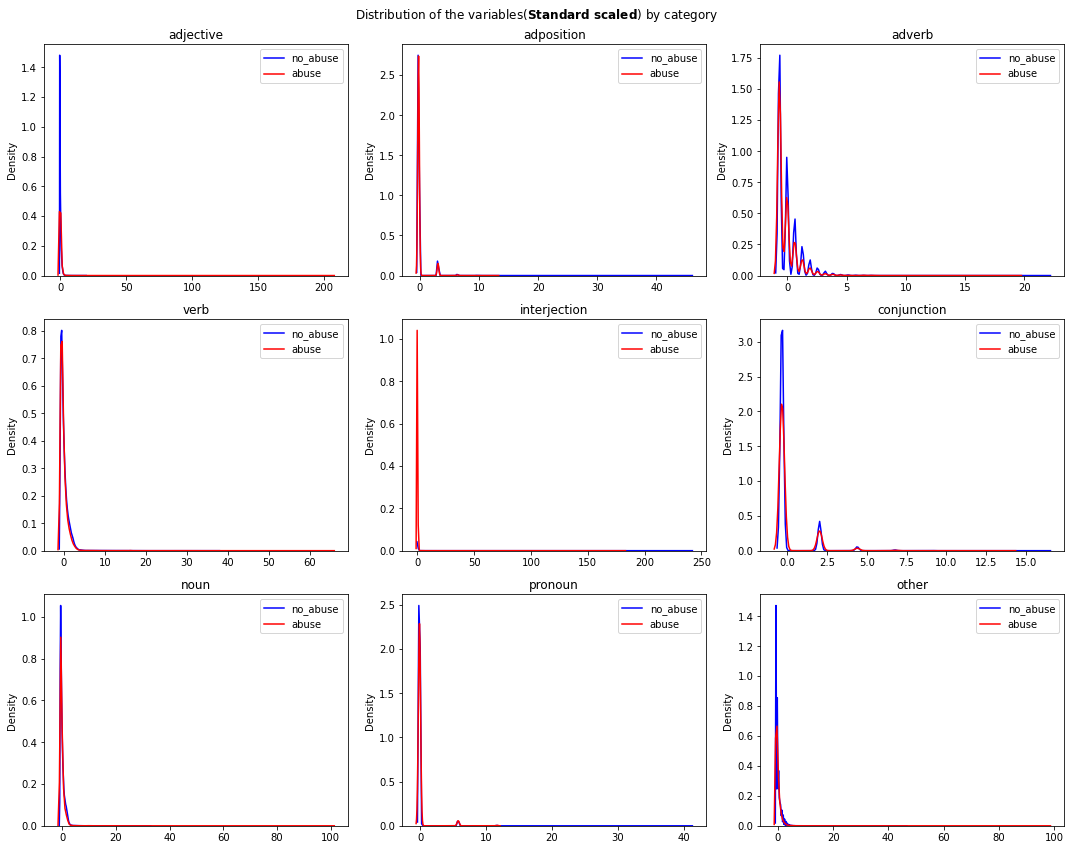

In [170]:
suptitle = r'Distribution of the variables($\bf{Standard \ scaled}$) by category'
distribution_plots(df, theta_list, 'label', 3, 3, suptitle=suptitle)

In [28]:
# sns.scatterplot(x=df.adverb, y=df.label, hue=df.label, alpha=0.5)
# plt.grid()

def scatter_plots(df, var_list, target_col_name, n_rows, n_cols, suptitle=None, caption=None):
    
    color_dict = {'abuse': 'red', 'no_abuse': 'blue'}
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    
#     cat_list = df[target_col_name].unique()
    
    row = 0
    col = 0
    for var in var_list:
        plt.subplot(ax[row][col])
        sns.scatterplot(x=df[var], y=df.label, hue=df.label, alpha=0.5)
        plt.grid()
#         for category in cat_list:
#             sns.distplot(df[var][df['label']==category], hist=False, label=category, color=color_dict[category])
#         plt.legend()
        ax[row][col].margins(0.05)
        plt.xlabel('')
        plt.title(var)
        
        col+=1
        if col == n_cols: # increment row (next row) and 
            row += 1
            col = 0
    
    if suptitle:
        plt.suptitle(suptitle)
    if caption:
        plt.figtext(0.5, 0.0, caption, wrap=True, horizontalalignment='center', fontsize=10)
        
    fig.tight_layout()
    plt.show()

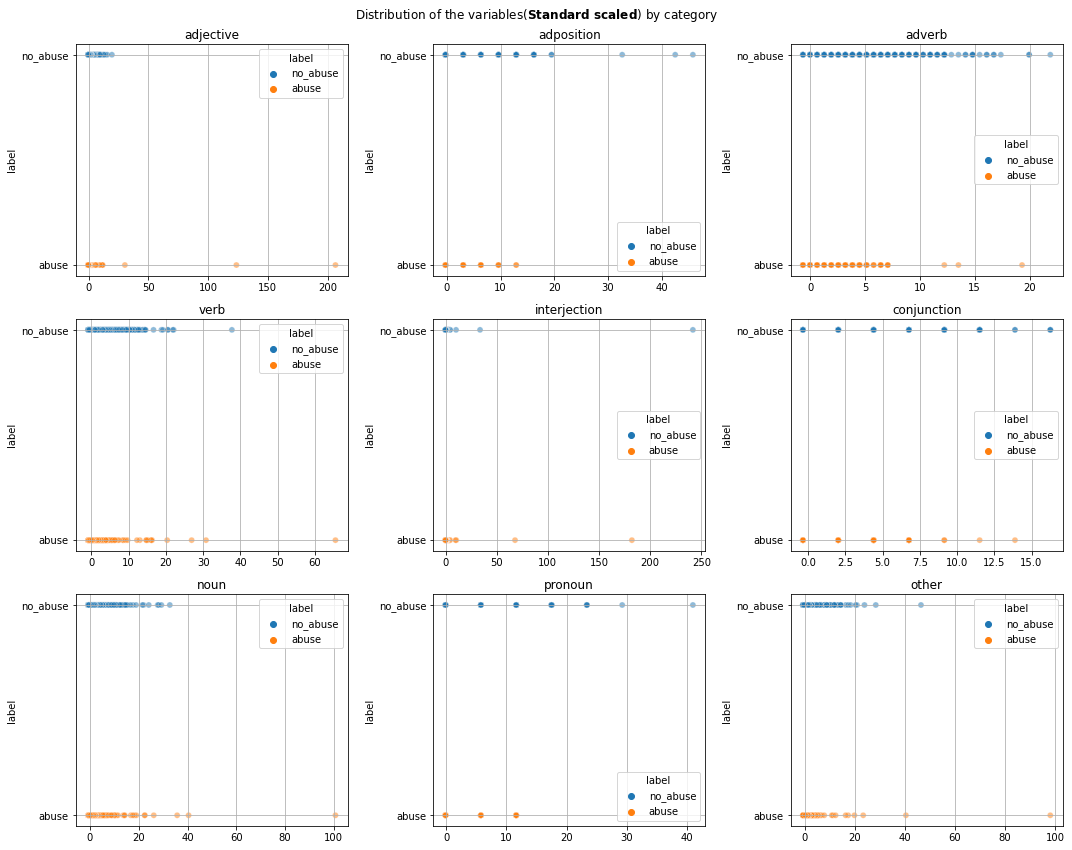

In [30]:
suptitle = r'Distribution of the variables($\bf{Standard \ scaled}$) by category'
scatter_plots(df, theta_list, 'label', 3, 3, suptitle=suptitle)

In [138]:
theta = list(df.columns).remove('label')

data = [
    go.Scatterpolar(
        r=[df[theta][df.label=="no_abuse"].median() for theta in theta_list],
        theta = theta_list,
        fill = 'toself',
        line = dict(color="blue"),
        name = "No Abuse",
        subplot = "polar1"
    ),
    
    go.Scatterpolar(
        r=[df[theta][df.label=="abuse"].median() for theta in theta_list],
        theta = theta_list,
        fill = 'toself',
        line = dict(color="red"),
        name = "Abuse",
        subplot = "polar2"
    )
]

layout = go.Layout(
    
    polar1 = dict(
      domain = dict(
        x = [0, 0.5],
        y = [0, 1]
      ),
      radialaxis = dict(visible = True)
    ),

    polar2 = dict(
      domain = dict(
        x = [0.5, 1],
        y = [0, 1]
      ),
      radialaxis = dict(visible = True)
    ),
    
    showlegend = True,
    title = "Median statistics(Standardized data)"
)

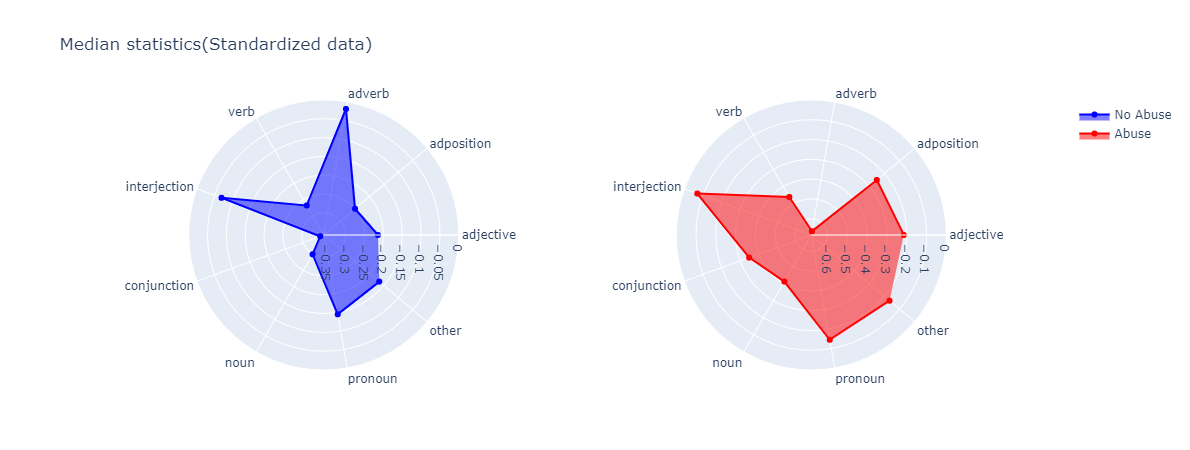

In [139]:
fig = go.Figure(data=data, layout=layout)
fig.show()

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [25]:
print("Variance Sorted in Descending order")
print("-"*50)
variance = VarianceThreshold().fit(df.loc[:, theta_list]).variances_
variance = pd.Series(variance, index=theta_list).sort_values(ascending=False)
variance

Variance Sorted in Descending order
--------------------------------------------------


noun            321.632234
adjective        45.150133
verb             26.922875
interjection     20.805906
other             3.986683
adverb            2.407661
conjunction       0.177580
adposition        0.092556
pronoun           0.028945
dtype: float64

Variance is only based on the variable.
Mutual information is relative to Target. 

In [52]:
from sklearn.feature_selection import mutual_info_classif

In [151]:
num_importance = mutual_info_classif(X = df.drop(columns=['label']), y = df['label'],
                                     discrete_features=False, random_state=42)

In [153]:
temp_data = pd.DataFrame(data = np.column_stack((df.drop(columns=['label']).columns, num_importance)),
                         columns = ['feature', 'mutual_info']
                        )
temp_data.mutual_info = temp_data.mutual_info.astype('float').round(5)
temp_data.sort_values('mutual_info', ascending=False)

,feature,mutual_info
5,conjunction,0.00510
8,other,0.00423
1,adposition,0.00399
2,adverb,0.00375
7,pronoun,0.00369
3,verb,0.00352
4,interjection,0.00270
0,adjective,0.00258
6,noun,0.00181


In [154]:
# calculate the correlation statisitcs
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

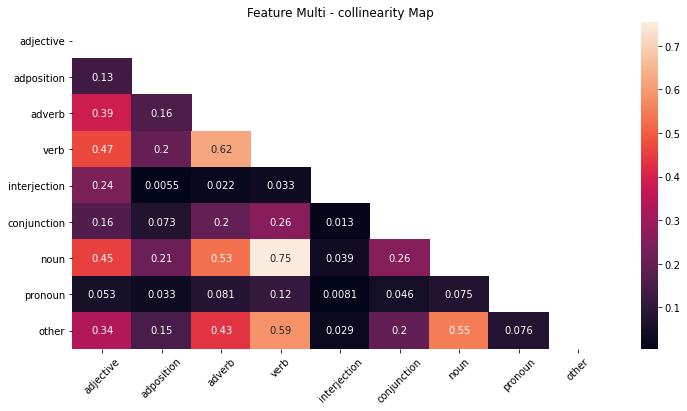

In [158]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Feature Multi - collinearity Map')
plt.xticks(rotation=45)
plt.show()

## Analysing Sentence based engineered features

In [52]:
train_cleaned = pd.read_csv("../cleaned_data/train_cleaned.csv", encoding="utf-8", header=0)
train_cleaned = train_cleaned.sample(10000)

In [53]:
# No of sentences
def sentence_feats(document):
    
    sent_list = []
    doc = nlp(str(document))
    # enumerate through the Sentences
    for i, token in enumerate(doc.sents):
        sent_list.append(token.text)
    
    # list of word count of each sentence
    len_lst = [len(sent.split()) for sent in sent_list]
    avg_sent_length = reduce(lambda x, y: x+y, len_lst)/len(len_lst)
    
    # No of sentences, average length of each sentence
    return len(sent_list), avg_sent_length 

In [54]:
start = time.time()
df = pd.DataFrame()
df[['num_sentences','avg_length_sentences']] = pd.DataFrame(train_cleaned.message.apply(sentence_feats).to_list())

end = time.time()

print("Time taken:", end - start)

Time taken: 204.62376737594604


In [55]:
df.shape

(10000, 2)

In [56]:
train_cleaned['num_sentences'] = df.num_sentences.values
train_cleaned['avg_length_sentences'] = df.avg_length_sentences.values

In [57]:
train_cleaned[['num_sentences', 'avg_length_sentences']].describe()

,num_sentences,avg_length_sentences
count,10000.000000,10000.000000
mean,2.556200,22.803489
std,7.775711,21.931828
min,1.000000,0.000000
25%,1.000000,11.000000
50%,2.000000,18.333333
75%,3.000000,28.500000
max,624.000000,1250.000000


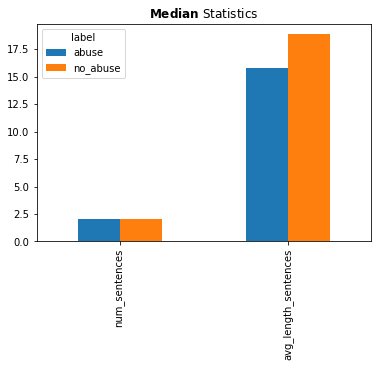

In [58]:
train_cleaned.groupby('label')[['num_sentences', 'avg_length_sentences']].median().T.plot(kind='bar')
plt.title(r'$\bf{Median}$ Statistics')
plt.show()

In [73]:
dist_data = train_cleaned[['num_sentences','avg_length_sentences', 'label']]

for col in ['num_sentences','avg_length_sentences']:
    dist_data[col] = StandardScaler().fit_transform(dist_data[col].values.reshape(-1,1))


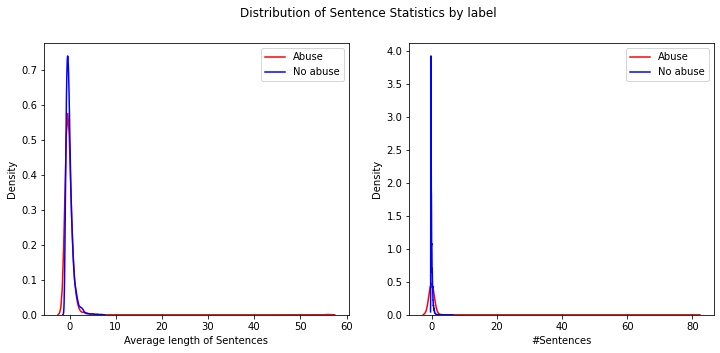

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
# Strandard scale the varibales
plt.subplot(ax[0])

sns.kdeplot(dist_data['avg_length_sentences'][dist_data['label']=='abuse'], color='red', label='Abuse')
sns.kdeplot(dist_data['avg_length_sentences'][dist_data['label']=='no_abuse'], color='blue', label='No abuse')
plt.xlabel("Average length of Sentences")
plt.legend()

plt.subplot(ax[1])

sns.kdeplot(dist_data['num_sentences'][dist_data['label']=='abuse'], color='red', label='Abuse')
sns.kdeplot(dist_data['num_sentences'][dist_data['label']=='no_abuse'], color='blue', label='No abuse')
# plt.xlim(0, 50)
plt.xlabel("#Sentences")
plt.legend()

plt.suptitle('Distribution of Sentence Statistics by label')

plt.show()

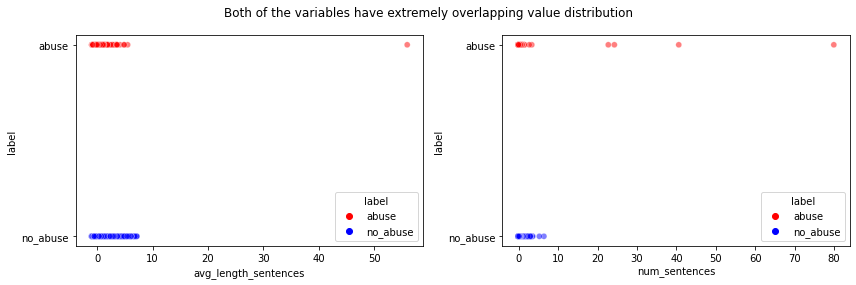

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=dist_data.avg_length_sentences, y=dist_data.label, hue=dist_data.label, alpha=0.5, palette={'abuse':'r', 'no_abuse':'b'}, ax=ax[0])
plt.grid()

sns.scatterplot(x=dist_data.num_sentences, y=dist_data.label, hue=dist_data.label, alpha=0.5, palette={'abuse':'r', 'no_abuse':'b'}, ax=ax[1])
plt.grid()


plt.suptitle('Both of the variables have extremely overlapping value distribution')
plt.tight_layout()
plt.show()


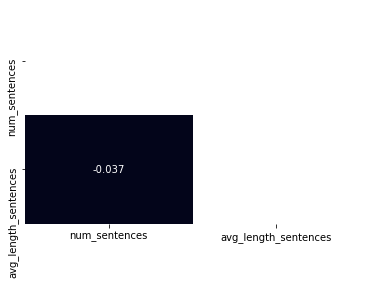

In [138]:
sns.heatmap(dist_data.corr(), annot=True, mask=np.triu(np.ones_like(dist_data.corr(), dtype=bool)), cbar=False)
plt.yticks(rotation=90)
plt.show()

## t - SNE

1. With all features
2. With top features

In [9]:
from sklearn import manifold

In [10]:
def perform_tsne(X, n_components=2, perplexity=30, learning_rate=200):
    '''
        This function performs tSNE on the Data (X) provided.
        All the parameters are default values from scikit learn implementation of TSNE
        
        Returns:
                tsne embedded data
    '''
    tsne = manifold.TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)

    # if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray())
    # .toarray() will convert the sparse matrix into dense matrix
    X_embedding = tsne.fit_transform(X)
    
    # return data with reduced dimensions
    return X_embedding



In [48]:
def plot_tsne(X_embedding, y, title):
    # hstack expects 2-D array
    # hence use of reshape(-1,1)
    tsne_df = pd.DataFrame(data=X_embedding, columns=['Dimension_x','Dimension_y'])
    tsne_df['Label'] = list(y)
#     tsne_df.info()
    
    plt.figure(figsize=(6,6))
    sns.scatterplot(x='Dimension_x', y='Dimension_y', hue='Label', data=tsne_df, alpha=0.5,
                    palette={'abuse':'r', 'no_abuse':'b'}, edgecolor= 'white', linewidth=0.5)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    

In [95]:
tsne_df = pd.DataFrame(data=tsne_data, columns=['Dimension_x','Dimension_y'])
tsne_df.info()
tsne_df['Label'] = list(df.label)
tsne_df.info()
# pd.DataFrame(data=np.column_stack([tsne_data, list(df.label)]), columns=['Dimension_x','Dimension_y','Label']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Dimension_x  100000 non-null  float32
 1   Dimension_y  100000 non-null  float32
dtypes: float32(2)
memory usage: 781.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Dimension_x  100000 non-null  float32
 1   Dimension_y  100000 non-null  float32
 2   Label        100000 non-null  object 
dtypes: float32(2), object(1)
memory usage: 1.5+ MB


In [99]:
tsne_df.describe()

,Dimension_x,Dimension_y
count,100000.000000,100000.000000
mean,-0.025383,0.131446
std,28.152578,28.028173
min,-62.476078,-62.978001
25%,-21.357834,-21.524571
50%,-0.065154,0.512301
75%,21.978509,21.035719
max,61.874836,63.561626


### tSNE on all Attributes

In [16]:
# df.label.value_counts()
# the columns in this dat frame has already been standard scaled
temp_data = df[df.label == 'no_abuse'].sample(5000).append(df[df.label == 'abuse'].sample(5000)).sample(frac=1)

In [18]:
tsne_data = perform_tsne(temp_data.loc[:, theta_list])

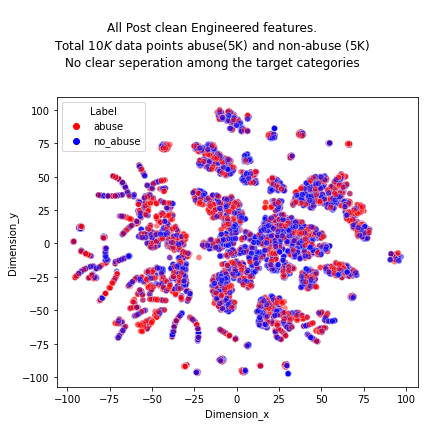

In [49]:
title = '''
All Post clean Engineered features.
Total $10K$ data points abuse(5K) and non-abuse (5K)
No clear seperation among the target categories
'''
plot_tsne(tsne_data, temp_data.label, title)

### tSNE on Selected attributes

In [50]:
tsne_data = perform_tsne(temp_data.loc[:, ['conjunction','other','adposition', 'adverb', 'pronoun', 'verb']])

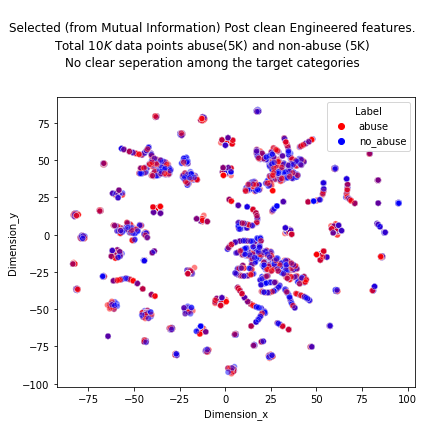

In [51]:
title = '''
Selected (from Mutual Information) Post clean Engineered features.
Total $10K$ data points abuse(5K) and non-abuse (5K)
No clear seperation among the target categories
'''
plot_tsne(tsne_data, temp_data.label, title)

### tSNE on Sentence based Features

In [68]:
dist_data_sample.label.value_counts()


abuse       951
no_abuse    951
Name: label, dtype: int64

In [67]:
dist_data_sample = dist_data[dist_data.label == 'no_abuse'].sample(951).append(dist_data[dist_data.label == 'abuse'].sample(951)).sample(frac=1)

In [69]:
tsne_data = perform_tsne(dist_data_sample.loc[:, ['num_sentences','avg_length_sentences']]) 

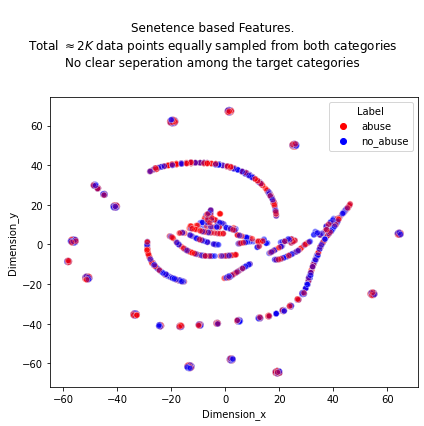

In [80]:
title = r'''
Senetence based Features.
Total $\approx 2K $ data points equally sampled from both categories
No clear seperation among the target categories
'''
plot_tsne(tsne_data, dist_data_sample.label, title)

# Summary Takeaway

The engineered features donot seem to have necessary discriminatory power. \
However, since the radar map showed distinct difference in shape of the median statistics for the categories it demands further Multivariate analysis.